In [27]:
%matplotlib inline

import numpy as np
from numpy.random import Generator as gen
from numpy.random import PCG64 as pcg
import matplotlib.pyplot as plt
from matplotlib import animation

In [26]:
def animate():
    pass

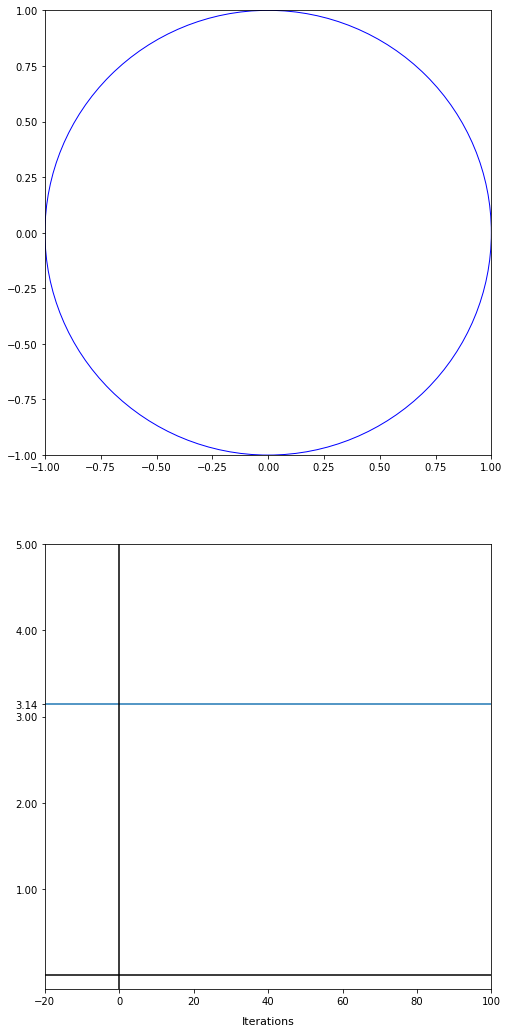

In [28]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 18)

circle = plt.Circle(xy=(0, 0), radius=1, fill=False, color='b')
axs[0].add_artist(circle)
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].axhline(y=np.pi)
axs[1].axhline(y=0, color='k')
axs[1].axvline(x=0, color='k')
axs[1].set_yticks([1, 2, 3, 3.14, 4, 5])
axs[1].set_xlim(-20, 100)
axs[1].set_xlabel("Iterations", fontsize=11, labelpad=10)

plt.show()